## Análisis de datos axploratorio - Prueba Técnica Científico de datos TIGO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
#!pip install pyxlsb --quiet

In [3]:
#!pip install python-calamine --quiet

In [4]:
datos_prueba = pd.read_excel('../data/202412_base_prueba.xlsb', sheet_name='datos', engine='calamine')
datos_prueba.head()

,User_ID,regional,departamento,ageing,data_usr,TECHNOLOGY,DEVICE_TECHNOLOGY,DEVICE_SUBTYPE,rev_tot,data_mb,...,CANAL,NPS,TESPERA_SEG,TABANDONO_SEG,DURACION_SEG,TIEMPO_AHT,MUNICIPIO,PERFIL_DIGITAL,VECTOR_PAGO,GENERACION_MOVIL
0,1,SUR,QUINDÍO,8,N,4G,4G,ANDROID,1397.00,5697.4,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,625.0,RIOSUCIO,5- ACERTIJO,NaN,NaN
1,2,ANDINA,BOYACÁ,11,Y,4G,2G,IPHONE,32557.92,5910.3,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,164.0,RICAURTE,1- FULL DIGITAL,NaN,NaN
2,3,ANDINA,ANTIOQUIA,9,Y,4G,4G,ANDROID,36565.80,34771.7,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,873.0,COPACABANA,NaN,NaN,NaN
3,4,ANDINA,ANTIOQUIA,21,Y,5G,2G,IPHONE,20589.15,4222.1,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,NaN,MEDELLIN,NaN,NaN,NaN
4,5,COSTA,CÓRDOBA,9,Y,4G,2G,ANDROID,29835.04,4048.7,...,canaltigo_mensajeria_whatsapp,NaN,0.0,0.0,0.0,894.0,LORICA,3- HIBRIDO,NaN,NaN


In [5]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530559 entries, 0 to 530558
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   User_ID              530559 non-null  int64         
 1   regional             530559 non-null  object        
 2   departamento         530559 non-null  object        
 3   ageing               530559 non-null  int64         
 4   data_usr             530559 non-null  object        
 5   TECHNOLOGY           530559 non-null  object        
 6   DEVICE_TECHNOLOGY    530559 non-null  object        
 7   DEVICE_SUBTYPE       530559 non-null  object        
 8   rev_tot              530559 non-null  float64       
 9   data_mb              530559 non-null  float64       
 10  conteo               94208 non-null   float64       
 11  FECHA_COL_min        94208 non-null   datetime64[ns]
 12  FECHA_COL_max        94208 non-null   datetime64[ns]
 13  CX_CANCELACION

In [6]:
c = ["User_ID","CX_QF", "CX_RECURSO", "CX_QS",
     "CX_PETICION", "CX_INTENCION_RET", "CX_INTENCION_NO_RET"]

correlations = (datos_prueba.select_dtypes(include=["int64", "float64"])
 .fillna(0).drop(columns=c).corr())

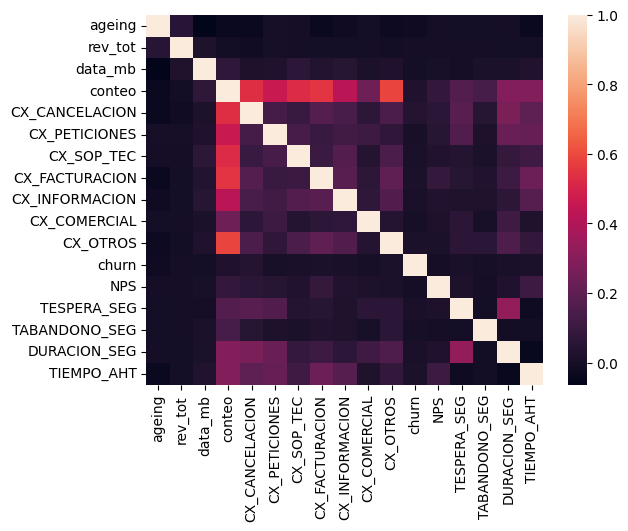

In [7]:
sns.heatmap(correlations, annot=False)
plt.show()

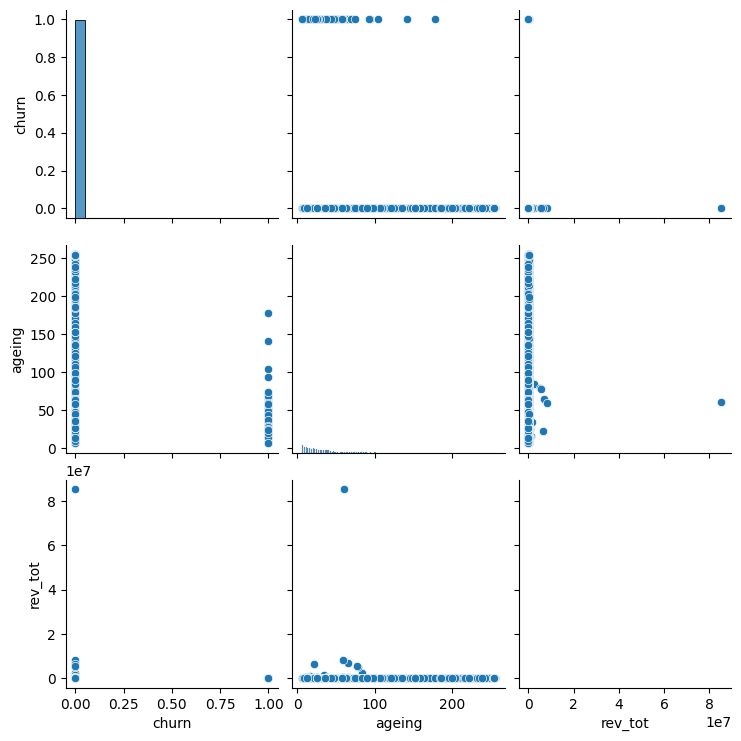

In [10]:
sns.pairplot(data=datos_prueba, vars=["churn", "ageing", "rev_tot"])

In [11]:
datos_prueba["NPS"].describe()

count    2313.000000
mean        7.408560
std         3.628327
min         0.000000
25%         6.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: NPS, dtype: float64

<Axes: xlabel='rev_tot', ylabel='Density'>

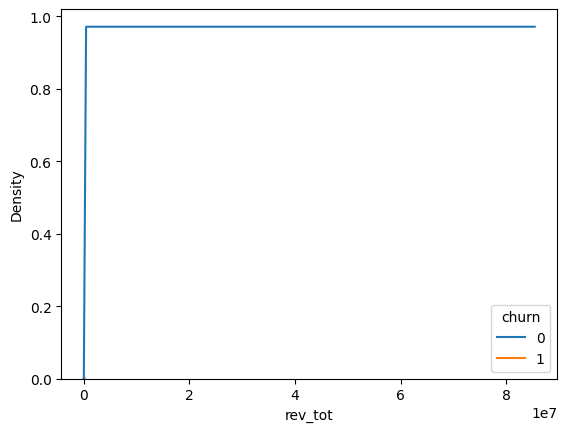

In [16]:
sns.kdeplot(data=datos_prueba, x="rev_tot", hue="churn", cut=0, cumulative=True)